![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
# **<center>Machine Learning Project</center>**
<center>CHOUKROUN Julien - GOURDON Jessica - LE Maxime - SAGNES Luc</center>


---



### Description du dataset choisi

Nous avons choisi le dataset "SpeedDating".

Ces données ont été recueillies auprès de participants à des speed dating. Les participants ont un "premier rendez-vous" de quatre minutes avec tous les autres participants du sexe opposé. À la fin de leurs quatre minutes, on a demandé aux participants s'ils aimeraient revoir leur rendez-vous. On leur a également demandé d'évaluer leur rencontre sur six attributs : l'attractivité, la sincérité, l'intelligence, le plaisir, l'ambition et les intérêts partagés. L'ensemble des données comprend également des données de questionnaire recueillies auprès des participants à différents moments du processus. Ces domaines comprennent : la démographie, les habitudes de rencontres, la perception de soi à travers les attributs clés, les croyances sur ce que les autres trouvent précieux chez un partenaire et les informations sur le mode de vie.

Importation des librairies.

In [1]:
# Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline
# Importation des librairies
import numpy as np # Effectuer des opérations et manipuler des tableaux
import matplotlib.pyplot as plt # Création de graphiques
import pandas # Permet d'accéder à des dataset
import seaborn as sb # Visualiser des données basé sur matplotlib
import networkx as nx # Dessiner une structure réseaux
from sklearn.cluster import KMeans # Utiliser le K-means clustering
from sklearn.cluster import SpectralClustering # Utiliser le spectral clustering
from sklearn.decomposition import PCA # Réduction de la dimensionnalité linéaire à l'aide de la décomposition en valeurs singulières des données pour les projeter dans un espace dimensionnel inférieur
from sklearn import preprocessing # Pour centrer et mettre à l'échelle les données pour le PCA
from scipy.linalg import fractional_matrix_power # Calcule la puissance fractionnaire d'une matrice
from sklearn.metrics import silhouette_score # Calcule les coefficients de Silhouette

Accès au dataset.

In [2]:
df = pandas.read_csv('speeddating.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Nous nous sommes rendu compte que ce dataset contenait des chaînes de caractère, donc nous avons décidé de supprimer les variables sans valeurs numériques.

Nous nous sommes aussi rendu compte de la présence de "?" lorsqu'il n'y a pas de réponse dans les catégories. Or, pour manipuler ce dataset, il nous faut les convertir en entiers.

Puis, nous avons choisi de travailler uniquement sur 7 variables.

In [3]:
# Suppression des colonnes sans valeurs numériques

# Nous prenons les colonnes de attractive et intelligence et nous prenons les 
# colonnes de ce que notre partenaire voudrait, comment il nous a noté, comment
# nous nous sommes noté afin de voir les différences entre notre vison et la sienne

# Colonnes à prendre : like, pref_o_attractive, attractive_o, attractive, 
# pref_o_intelligence, intelligence_o, intelligence
col = df.columns
collist = ['like', 'pref_o_attractive', 'attractive_o', 'attractive', 'pref_o_intelligence', 'intelligence_o', 'intelligence']
df = df[collist]
print(df)

# On supprime les lignes des colonnes qui nous interressent qui ont des "?"
indexV1 = df[ df['like'] == '?' ].index
indexV1 = indexV1.to_numpy()

indexV2 = df[ df['pref_o_attractive'] == '?' ].index
indexV2 = indexV2.to_numpy()

indexV3 = df[ df['attractive_o'] == '?' ].index
indexV3 = indexV3.to_numpy()

indexV4 = df[ df['attractive'] == '?' ].index
indexV4 = indexV4.to_numpy()

indexV5 = df[ df['pref_o_intelligence'] == '?' ].index
indexV5 = indexV5.to_numpy()

indexV6 = df[ df['intelligence_o'] == '?' ].index
indexV6 = indexV6.to_numpy()

indexV7 = df[ df['intelligence'] == '?' ].index
indexV7 = indexV7.to_numpy()

indexV = np.unique(np.concatenate((indexV1, indexV2, indexV3, indexV4, indexV5, indexV6, indexV7), axis=None))

df.drop(indexV ,inplace=True)
print(df.shape)

     like pref_o_attractive  ... intelligence_o intelligence
0       7                35  ...              8            8
1       7                60  ...             10            8
2       7                19  ...             10            8
3       7                30  ...              9            8
4       6                30  ...              9            8
...   ...               ...  ...            ...          ...
8373    2                10  ...              3            6
8374    4                50  ...              7            6
8375    6                40  ...              2            6
8376    5                10  ...              5            6
8377    4                20  ...              7            6

[8378 rows x 7 columns]
(7796, 7)


On convertit la dataframe en array.

In [4]:
x = df.to_numpy()
print(x.shape)

(7796, 7)


On sélectionne les colonnes qu'on veut étudier par la suite, c'est-à-dire, toutes ici puisqu'on a déjà supprimé les colonnes qu'on ne voulait pas.

In [5]:
V1 = x[:,:]

On convertit toutes nos données en floatant.

In [6]:
V1 = V1.astype(float)
V = np.array(V1)
print(np.shape(V))
print(V)
# On réduit la taille de notre matrice par soucis de vitesse d'exécution
Vreduit=V[0:1000,:]
dfreduit=df.iloc[0:1000,:]

(7796, 7)
[[ 7. 35.  6. ... 20.  8.  8.]
 [ 7. 60.  7. ...  0. 10.  8.]
 [ 7. 19. 10. ... 19. 10.  8.]
 ...
 [ 6. 40.  2. ... 30.  2.  6.]
 [ 5. 10.  5. ... 25.  5.  6.]
 [ 4. 20.  8. ... 10.  7.  6.]]


### Application du K-means sur le dataset

In [7]:
# On fixe le nombre des clusters à 3 puis on utilise la librairie Sklearn
kmeans = KMeans(n_clusters=3, random_state=0).fit(Vreduit)
print("Label de chaque point : \n", kmeans.labels_) # Label de chaque point
print("Coordonées des centroids : \n", kmeans.cluster_centers_) # Coordonées des centroids
print("Somme des distances au carré de chaque point à son centre assigné : \n", kmeans.inertia_) # Somme des distances au carré de chaque point à son centroïd

Label de chaque point : 
 [1 2 0 1 1 1 1 1 1 2 1 2 0 1 1 1 1 1 1 2 1 2 0 1 1 1 1 1 1 2 1 2 0 1 1 1 1
 1 1 2 1 2 0 1 1 1 1 1 1 2 1 2 0 1 1 1 1 1 1 2 1 2 0 1 1 1 1 1 1 2 1 2 0 1
 1 1 1 1 1 2 1 2 0 1 1 1 1 1 1 2 1 2 0 1 1 1 1 1 2 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1

Pour visualiser graphiquement ce résultat, on peut utiliser l'analyse en composantes principales (PCA).

Tout d'abord, on cherche le nombre de composantes pricipales à utiliser.

In [8]:
V_scaled = preprocessing.scale(Vreduit) # Standardisation : centre et met à l'échelle les données

pca = PCA()
pca.fit(V_scaled) # Crée le modèle

x = range(1,8)
y = pca.explained_variance_ratio_ # Pourcentage de variance exprimé par chacune des composantes

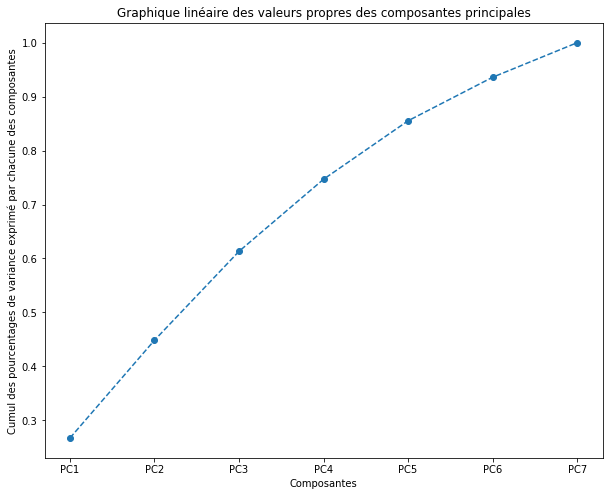

In [9]:
plt.figure(figsize=(10,8))
plt.plot(x, np.cumsum(y), marker="o", linestyle='--')
plt.xlabel('Composantes')
plt.ylabel('Cumul des pourcentages de variance exprimé par chacune des composantes')
plt.title("Graphique linéaire des valeurs propres des composantes principales")
my_xticks = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
plt.xticks(x, my_xticks) # Définit les emplacements et les étiquettes de graduation actuels de l'axe des x
plt.show()

Puis, on applique le K-means et on affiche le graphe.

In [10]:
pca = PCA(n_components=4) # On choisit 4 composants. 4 semble le bon choix selon le graphique précédent
pca.fit(V_scaled) # Crée le modèle

scores_pca = pca.transform(V_scaled) # Applique la réduction de dimensionnalité

kmeans_pca = KMeans(n_clusters=3, random_state=0).fit(scores_pca) # Applique le K-means

In [11]:
# On ajoute à notre dataframe les colonnes correspondants à nos composantes principales
# drop = True : permet d'insérer de nouveaux index
df_segm_pca_kmeans = pandas.concat([dfreduit.reset_index(drop=True), pandas.DataFrame(scores_pca)], axis=1)
# On renomme les 4 dernières colonnes
df_segm_pca_kmeans.columns.values[-4: ] = ['Composante 1', 'Composante 2', 'Composante 3', 'Composante 4']
# On ajoute une nouvelle colonne contenant les labels
df_segm_pca_kmeans['K-means PCA'] = kmeans_pca.labels_

# On ajoute une légende au graphique
df_segm_pca_kmeans['Clusters']=df_segm_pca_kmeans['K-means PCA'].map({0:'premier', 1:'deuxième', 2:'troisième'})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


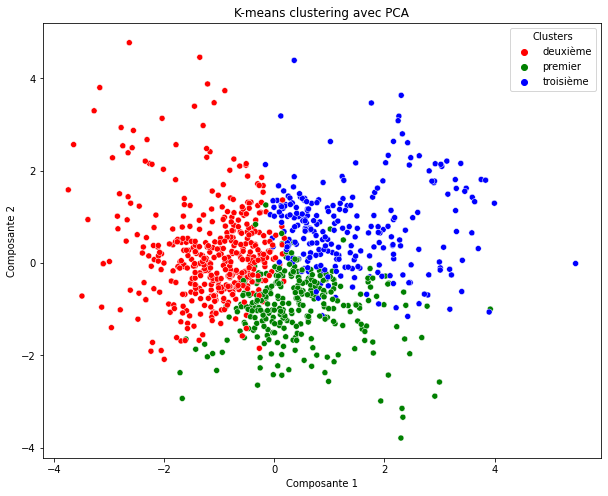

In [12]:
x_axis=df_segm_pca_kmeans['Composante 1']
y_axis=df_segm_pca_kmeans['Composante 2']

plt.figure(figsize=(10,8))
# hue : variable de regroupement qui produira des points de différentes couleurs
# palette : choix de la couleur
sb.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Clusters'], palette=['r','g','b'])
plt.title("K-means clustering avec PCA")
plt.show()

On remarque que les clusters sont plutôt homogènes.

### Application des connectivity graph sur le dataset

La convertion des données en la matrice adjacente va se faire avec la fonction adMatrix.

In [13]:
# Distance euclidienne
def Distance(p1,p2):
  return np.sqrt(np.sum(np.square(p1-p2)))

In [14]:
# Matrice d'adjacence
# Les coefficients sont la similarité/poids des points i et j
# @arg lPoints : np.array où chaque ligne est un tuple/point
def adMatrix(lPoints,sig=2):
  n = lPoints.shape[0]
  AM = np.zeros((n,n))
  for i in range(0,n):
    for j in range(i+1,n):
      AM[i,j] = np.exp((-(Distance(lPoints[i,:],lPoints[j,:])**2))/(2*sig**2) ) # exp( -d(i,j)**2 / 2 sigma**2)
  return AM + AM.transpose()

Pour le epsilon neighborhood graph, il va y avoir un tri des coefficients, c'est-à-dire mettre à zéro les arrêtes avec un(e) poids/similarité trop faible (inférieure à epsilon) dans la matrice d'adjacence.

De plus, nous avons réduit la taille de l'échantillon afin de réduire les temps de calcul et de rendre nos graphes plus lisibles

In [15]:
# Pour le epsilon neighborhood graph 
# On met à zéro tous les termes inférieur à espilon à zéro (poids trop faible)
def filterAM(AM,eps):
  AM=(AM>eps)*AM 
  return AM

In [16]:
W = adMatrix(V[0:500,:])
# On a fixé epsilon à 0.8
EspilonMatrix = filterAM(W, 0.8)
print(np.where(EspilonMatrix!=0))

(array([ 15,  40,  85, 107, 111, 113, 115, 131, 133, 135, 143, 173, 177,
       178, 216, 220, 222, 223, 232, 236, 247, 251, 251, 253, 257, 257,
       258, 258, 258, 262, 262, 264, 264, 264, 271, 276, 286, 292, 294,
       295, 299, 321, 326, 338, 339, 340, 343, 347, 347, 351, 356, 356,
       358, 359, 359, 359, 362, 362, 362, 363, 369, 370, 371, 371, 372,
       374, 375, 377, 381, 383, 386, 386, 388, 390, 390, 393, 394, 402,
       408, 409, 409, 412, 427, 433, 444, 446, 449, 449, 461, 464, 498,
       499]), array([ 85, 375,  15, 446, 131, 133, 135, 111, 113, 115, 388, 372, 374,
       377, 427, 386, 433, 383, 236, 232, 359, 356, 359, 358, 258, 408,
       257, 362, 363, 390, 449, 381, 386, 444, 286, 412, 271, 299, 295,
       294, 292, 351, 359, 339, 338, 343, 340, 362, 409, 321, 251, 402,
       253, 247, 251, 326, 258, 347, 409, 258, 370, 369, 461, 464, 173,
       177,  40, 178, 264, 223, 220, 264, 143, 262, 449, 394, 393, 356,
       257, 347, 362, 276, 216, 222, 264, 107, 26

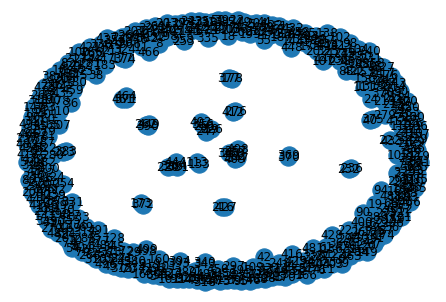

In [17]:
# Graphe du epsilon neighborhood graph à l'aide de la librairie networkx
G = nx.from_numpy_matrix(EspilonMatrix)
nx.draw(G, with_labels=True, font_weight='10')

Pour le k-nearest neighbor graph, nous allons choisir le nombre de voisin possible d'un point et les points les plus proches de chacun vont se lier.

Dans le cas du mutual k-nearest neighbor graph, dans la matrice d'adjacence, toutes lignes et colonnes vont garder que les k-premiers coefficients ayant le poids le plus élevé.  

In [18]:
W = adMatrix(V[0:500,:])
# Nombre de voisin 
k = 6

n = W.shape[0] # Nombre de points 
voisin = np.zeros((n,n))
for i in range(0,n):  # Pour chaque point
  ind = np.argsort(W[i])[1:k+1]  # On récupère les indices de ses k-voisins
  voisin[i][ind] = W[i][ind] # Sur la ligne on aura que des 0 sauf pour ces k indices où on aura les distances
mutual = np.multiply(voisin, np.transpose(voisin)) # On multiplie membre à membre pour enlever les connexions à sens unique
mutual = np.where(mutual==0, mutual, voisin) # On remet les bonnes valeurs aux endroits des connexions mutuelles
#print(sum(mutual-voisin)) # Vérification que les matrices sont bien différentes

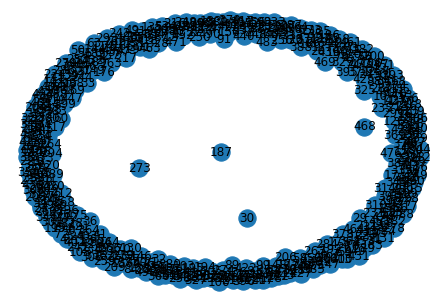

In [19]:
# Graphe du mutual k-nearest neighbor graph à l'aide de la librairie networkx
G = nx.from_numpy_matrix(mutual)
nx.draw(G, with_labels=True, font_weight='10')

On remarque cette forme circulaire dans les deux cas avec quelques exception au milieu. 

### Application du spectral clustering sur le dataset

Pour le spectral clustering, nous allons nous servir de l'algorithme de Shi & Malik.

Pour les calculs de matrice adjacente afin de réduire le temps de calcul, nous avons décidé de travailler avec un échantillon de taille 1000.

In [20]:
def Shi_Malik(W,k): # W est la matrice adjacence et k est le nombre de cluster que l'on fixe
    d = np.sum(W, axis=0)
    D = np.diag(d)
    L = D-W
    Ls = (fractional_matrix_power(D,-1/2).dot(L)).dot(fractional_matrix_power(D,-1/2))
    lbda, V = np.linalg.eig(Ls)
    ind = np.argsort(lbda)
    sort_lbda = lbda[ind]
    sort_V = V[:,ind]
    dim=np.shape(W)[0]
    Vfinal = np.zeros((dim,k))
    for i in range(k):
      Vfinal[:,i] = sort_V[i,:] # On cree la matrice V=[v1,v2,...,vk] à laquelle on va appliquer le kmeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Vfinal)
    #print(kmeans.labels_) # Label de chaque point
    return kmeans.labels_

Pour visualiser graphiquement ce résultat, on peut utiliser l'analyse en composantes principales (PCA).

Tout d'abord, on cherche le nombre de composantes pricipales à utiliser.

In [21]:
V_scaled = preprocessing.scale(Vreduit) # Standardisation : centre et met à l'échelle les données

pca = PCA()
pca.fit(V_scaled) # Crée le modèle

x = range(1,8)
y = pca.explained_variance_ratio_ # Pourcentage de variance exprimé par chacune des composantes

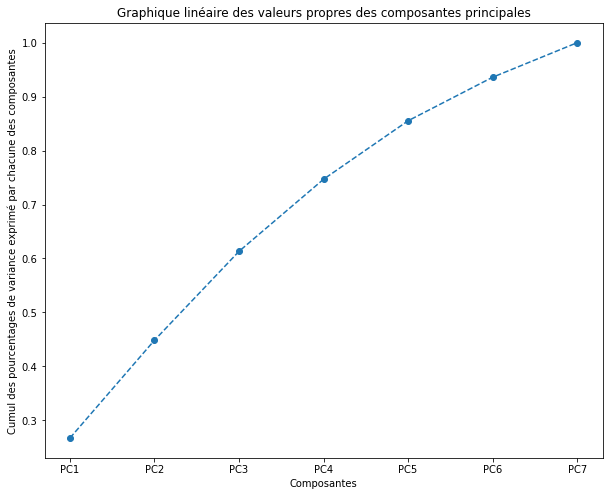

In [22]:
plt.figure(figsize=(10,8))
plt.plot(x, np.cumsum(y), marker="o", linestyle='--')
plt.xlabel('Composantes')
plt.ylabel('Cumul des pourcentages de variance exprimé par chacune des composantes')
plt.title("Graphique linéaire des valeurs propres des composantes principales")
my_xticks = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
plt.xticks(x, my_xticks) # Définit les emplacements et les étiquettes de graduation actuels de l'axe des x
plt.show()

Puis, on applique le K-means et on affiche le graphe.

In [23]:
pca = PCA(n_components=4) # On choisit 4 composants. 4 semble le bon choix selon le graphique précédent
pca.fit(V_scaled) # Crée le modèle

scores_pca = pca.transform(V_scaled) # Applique la réduction de dimensionnalité

W = adMatrix(Vreduit)
clustering_pca = Shi_Malik(W,k=3) # Applique l'algorithme de Shi & Malik pour le Spectral Clustering

In [24]:
# On ajoute à notre dataframe les colonnes correspondants à nos composantes principales
# drop = True : permet d'insérer de nouveaux index
df_segm_pca_kmeans = pandas.concat([dfreduit.reset_index(drop=True), pandas.DataFrame(scores_pca)], axis=1)
# On renomme les 4 dernières colonnes
df_segm_pca_kmeans.columns.values[-2: ] = ['Composante 1', 'Composante 2']
# On ajoute une nouvelle colonne contenant les labels
df_segm_pca_kmeans['Spectral clustering PCA'] = clustering_pca

# On ajoute une légende au graphique
df_segm_pca_kmeans['Clusters']=df_segm_pca_kmeans['Spectral clustering PCA'].map({0:'premier', 1:'deuxième', 2:'troisième'})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


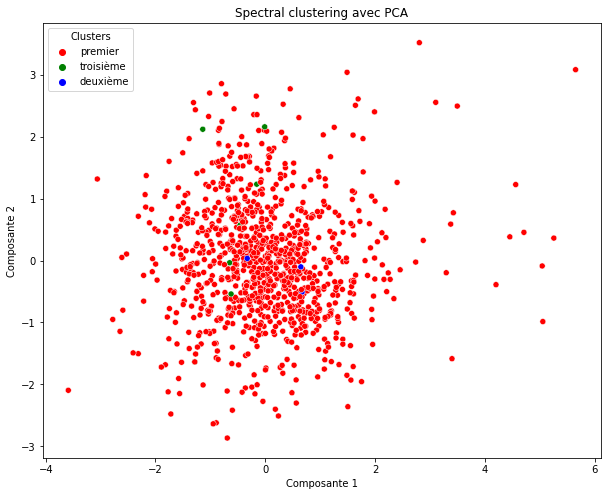

In [25]:
x_axis=df_segm_pca_kmeans['Composante 1']
y_axis=df_segm_pca_kmeans['Composante 2']

plt.figure(figsize=(10,8))
# hue : variable de regroupement qui produira des points de différentes couleurs
# palette : choix de la couleur
sb.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Clusters'], palette=['r','g','b'])
plt.title("Spectral clustering avec PCA")
plt.show()

On remarque qu'un cluster est dominant.

Pour vérifier nos calculs, on a décidé d'utiliser la librairie Sklearn pour le Spectral Clustering.

In [26]:
clustering = SpectralClustering(n_clusters=3, random_state=0).fit(Vreduit)
print(clustering.labels_)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [27]:
V_scaled = preprocessing.scale(Vreduit) # Standardisation : centre et met à l'échelle les données

pca = PCA()
pca.fit(V_scaled) # Crée le modèle

x = range(1,8)
y = pca.explained_variance_ratio_ # Pourcentage de variance exprimé par chacune des composantes

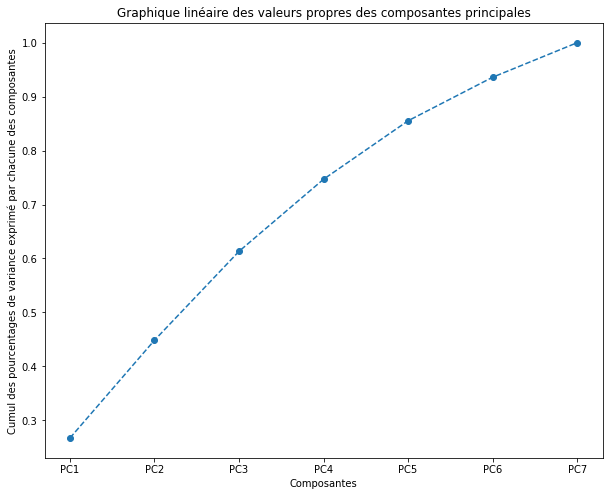

In [28]:
plt.figure(figsize=(10,8))
plt.plot(x, np.cumsum(y), marker="o", linestyle='--')
plt.xlabel('Composantes')
plt.ylabel('Cumul des pourcentages de variance exprimé par chacune des composantes')
plt.title("Graphique linéaire des valeurs propres des composantes principales")
my_xticks = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
plt.xticks(x, my_xticks) # Définit les emplacements et les étiquettes de graduation actuels de l'axe des x
plt.show()

In [29]:
pca = PCA(n_components=4) # On choisit 4 composants. 4 semble le bon choix selon le graphique précédent
pca.fit(V_scaled) # Crée le modèle

scores_pca = pca.transform(V_scaled) # Applique la réduction de dimensionnalité

clustering_pca = SpectralClustering(n_clusters=3, random_state=0).fit(Vreduit) # Applique le Spectral Clustering à l'aide de la librairie Sklearn

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [30]:
# On ajoute à notre dataframe les colonnes correspondants à nos composantes principales
# drop = True : permet d'insérer de nouveaux index
df_segm_pca_kmeans = pandas.concat([dfreduit.reset_index(drop=True), pandas.DataFrame(scores_pca)], axis=1)
# On renomme les 4 dernières colonnes
df_segm_pca_kmeans.columns.values[-4: ] = ['Composante 1', 'Composante 2', 'Composante 3', 'Composante 4']
# On ajoute une nouvelle colonne contenant les labels
df_segm_pca_kmeans['Spectral clustering PCA'] = clustering_pca.labels_

# On ajoute une légende au graphique
df_segm_pca_kmeans['Clusters']=df_segm_pca_kmeans['Spectral clustering PCA'].map({0:'premier', 1:'deuxième', 2:'troisième'})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


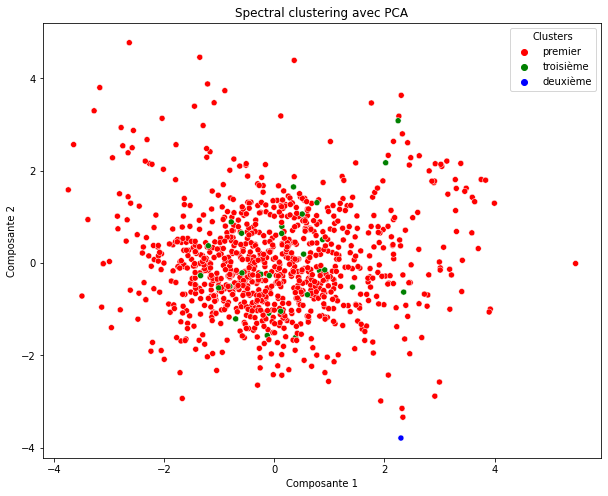

In [31]:
x_axis=df_segm_pca_kmeans['Composante 1']
y_axis=df_segm_pca_kmeans['Composante 2']

plt.figure(figsize=(10,8))
# hue : variable de regroupement qui produira des points de différentes couleurs
# palette : choix de la couleur
sb.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Clusters'], palette=['r','g','b'])
plt.title("Spectral clustering avec PCA")
plt.show()

On remarque qu'il y a un cluster dominant pour le spectral clustering par rapport au k means où les 3 clusters sont plus homogènes.

### Choix du nombre de clusters avec une méthode unsupervised

Une première méthode est la méthode Elbow.

Le but est d'effectuer un clustering K-means pour une plage de clusters k et pour chaque valeur, nous calculons la somme des distances au carré de chaque point à son centre assigné (distorsion).

Lorsque les distorsions sont tracées et que le tracé ressemble à un bras, le "coude" (le point d'inflexion sur la courbe) est la meilleure valeur de k.

In [32]:
distorsion = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(V)
    distorsion.append(kmeans.inertia_) # kmeans.inertia_ : somme des distances au carré de chaque point à son centre assigné (centroïd)

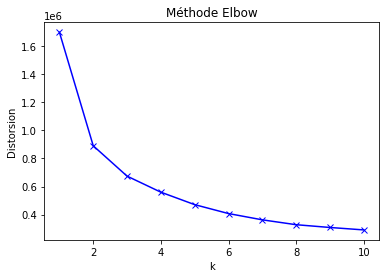

In [33]:
plt.plot(K, distorsion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsion')
plt.title('Méthode Elbow')
plt.show()

Une deuxième méthode est la méthode Silhouette.

Le but est de calculer le coefficient de silhouette. Ce coefficient représente la différence entre la distance moyenne avec les points du même groupe que lui et la distance moyenne avec les points des autres groupes voisins. Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de Silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points.

In [34]:
for k in range(2,11):
    #fit_predict : calcule les centres de cluster et prédit l'index des clusters pour chaque élément de la matrice
    kmeans_predict = KMeans(n_clusters=k, random_state=0).fit_predict(V)
    silhouette_avg = silhouette_score(V, kmeans_predict)
    print(k, " clusters : ", silhouette_avg)

2  clusters :  0.5966180023483351
3  clusters :  0.37373077384848674
4  clusters :  0.35484025645007006
5  clusters :  0.3070992777345215
6  clusters :  0.2603626525526301
7  clusters :  0.2549242856022251
8  clusters :  0.25468499620461255
9  clusters :  0.23730459691762976
10  clusters :  0.2609046252275726


Finalement, nous cherchions à comparer la méthode du K-means et le spectral clustering. Par rapport à nos données et nos observations, nous avons de meilleurs résultats en appliquant le k-means. On distingue bien 3 différents clusters ayant un nombre de points relativement similaire. Lorsque l'on observe les résultats du spectral clustering, on ne parvient pas à distinguer les 3 clusters. Il y a une dominance de l'un d'entre eux et les deux autres ne sont pas visibles. Pour remédier à cela, nous pourrions modifier la valeur de sigma et epsilon. En effet, ici, la plupart des points appartiennent à un seul cluster, nous avons donc un sigma non adapté c'est-à dire une zone de coupure non-adaptée